<a href="https://colab.research.google.com/github/inhoYoo/korea_edu/blob/main/middle_report.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install konlpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126333 files and direc

In [5]:
# 네이버 검색 API 예제 - 뉴스 검색
import os
import json
import re
import urllib.request
import pandas as pd
from konlpy.tag import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# 검색 키워드
search_keyword = 'MCP'

# 계정 정보
client_id = "EPCR5d1whNbimUA9ICpK"
client_secret = "oAjgY5t6Pi"

# 검색 키워드 변환 - display 100
encText = urllib.parse.quote(str(search_keyword))
url = "https://openapi.naver.com/v1/search/news.json?query=" + encText + "&display=100"

# url Request 구성
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)

# url Request 요청
response = urllib.request.urlopen(request)
rescode = response.getcode()

# request 상태 체크 후 결과 가져오기 - 200(성공)
if(rescode==200):
    response_body = response.read()
    print('request Success')
    # print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

# 최종 텍스트 가져오기
response_result = response_body.decode('utf-8')
response_result = json.loads(response_result)
df = pd.DataFrame(response_result['items'])
df

request Success


,title,originallink,link,description,pubDate
0,"카르나크, 사전예약 앱 '모비'와 콜라보 이벤트 진행",http://game.dailyesports.com/view.php?ud=20250...,https://m.sports.naver.com/esports/article/347...,4월 23일부터 5월 6일까지 진행되는 '카르나크 × 모비' 콜라보 이벤트에 참여하...,"Mon, 28 Apr 2025 14:12:00 +0900"
1,"만점 받는 AI, 과연 만능일까 [고평석의 인사이드아웃 AI ]",https://www.sisajournal.com/news/articleView.h...,https://n.news.naver.com/mnews/article/586/000...,일 잘하는 AI 기반 <b>MCP</b> 등장 이제 진짜 대단한 기술이 등장했다. ...,"Mon, 28 Apr 2025 12:00:00 +0900"
2,&quot;삼성에서 MBA 이상으로 배웠다&quot;…10억명 쓰는 AI기업 만드는...,https://www.sedaily.com/NewsView/2GRP3S4K83,https://n.news.naver.com/mnews/article/011/000...,투플랫폼은 올 초 앤스로픽에서 공개한 모델콘텍스트프로토콜(<b>MCP</b>) 표준...,"Mon, 28 Apr 2025 08:30:00 +0900"
3,바이두 &quot;딥시크 수요 줄어...텍스트 시대 지나고 멀티모달이 대세&quot;,https://www.aitimes.com/news/articleView.html?...,https://www.aitimes.com/news/articleView.html?...,이를 지원하기 위해 앤트로픽의 '모델 컨텍스트 프로토콜(<b>MCP</b>)'을 도...,"Sun, 27 Apr 2025 22:02:00 +0900"
4,&quot;삼성서 큰 경험…10억명 쓰는 AI 기업될 것&quot;,https://www.sedaily.com/NewsView/2GRONV94IK,https://n.news.naver.com/mnews/article/011/000...,투플랫폼은 올 초 앤스로픽에서 공개한 모델콘텍스트프로토콜(<b>MCP</b>) 표준...,"Sun, 27 Apr 2025 17:50:00 +0900"
...,...,...,...,...,...
95,AI에이전트 무제한 연결… '<b>MCP</b> 꽂아라' 속도전하는 기업들,https://www.sedaily.com/NewsView/2GRMC0N8R0,https://n.news.naver.com/mnews/article/011/000...,프로토콜(<b>MCP</b>) 도입에 기업들이 속도전을 벌이고 있다. AI스타트업 ...,"Tue, 22 Apr 2025 06:31:00 +0900"
96,"&quot;기업이 쓸 AI에이전트 개발지원&quot; 올거나이즈, <b>MCP</b...",http://news.mt.co.kr/mtview.php?no=20250421145...,https://n.news.naver.com/mnews/article/008/000...,LLM(거대언어모델) 구축 솔루션 스타트업 올거나이즈가 기업이 안전하게 AI 에이전...,"Mon, 21 Apr 2025 22:00:00 +0900"
97,"부동산마케팅協, 'AI 부트캠프 멤버십' 론칭…업무 생산성 강화",https://www.bizwork.co.kr/news/articleView.htm...,https://www.bizwork.co.kr/news/articleView.htm...,특히 최근 각광받는 <b>MCP</b>(Model Context Protocol)연...,"Mon, 21 Apr 2025 17:22:00 +0900"
98,"올거나이즈, <b>MCP</b> 기반 '알리 에이전트 빌더' 출시",https://www.etnews.com/20250421000434,https://n.news.naver.com/mnews/article/030/000...,올거나이즈가 기업 환경에서 안전하게 인공지능(AI) 에이전트를 구축할 수 있는 <b...,"Mon, 21 Apr 2025 16:58:00 +0900"


In [6]:
# 텍스트 전처리를 모듈화

def regex(ls: list) -> str :
  all_title = ' '. join(ls)
  all_title = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", all_title)
  all_title = re.sub(r"[a-zA-Z]", "", all_title)
  all_title = re.sub(r"[0-9]", "", all_title)
  all_title = re.sub(' +', ' ', all_title)
  all_title = all_title.replace("\t",'')

  return all_title

all_title = regex(list(df['title']))

In [7]:
all_title

'카르나크 사전예약 앱 모비와 콜라보 이벤트 진행 만점 받는 과연 만능일까 고평석의 인사이드아웃 삼성에서 이상으로 배웠다억명 쓰는 기업 만드는 이 회사 바이두 딥시크 수요 줄어텍스트 시대 지나고 멀티모달이 대세 삼성서 큰 경험억명 쓰는 기업될 것 부트캠프 공동창업자 마크 라이든 와 시대 스브스뉴스 이제야 를 대하는 화가의 마음을 알겠다 때문에 편 저녁 뉴스브리핑 블랙록 등 개 기관 토큰화된 미국 국채 보유 바이두 딥시크보다 저렴한 고성능 모델 출시 디노티시아 인사이트 선정 리오랩 기획디자인 자동화 협업 매니패스트 베타 서비스 디노티시아 인프라 혁신 기업으로 주목 코아스템켐온 루게릭병 치료제 임상 상 수령특정 환자군 개 디노티시아 인사이트 선정 딥시크 반값 챗만큼 똑똑갓성비 바이두 전쟁 출격 디노티시아 글로벌 선정벡터 로 기술력 입증 디노티시아 인사이트 글로벌 선정 코아스템켐온 뉴로나타알 하위그룹 임상지표 및 바이오마커 유의성 확 코아스템켐온 뉴로나타알 상 최종결과 수령유의성 확보 가속승 기업 개발팀을 위한 바이브 코딩 커서 실무 클래스 개설최수민 대 코아스템켐온 뉴로나타알 상 최종결과 수령하위그룹 임상지표바 디노티시아 인사이트 선정 인프라 혁신 기업 코아스템켐온 뉴로나타알 상 최종보고서 수령 디노티시아 인사이트 선정 리오랩 기획디자인 자동화 협업 매니패스트 베타 서비스 인사이트 대 에 국내 개사 선정트웰브랩스 년 연속 디노티시아 인사이트 글로벌 선정 실리콘밸리 리포트 가 준 기회 년으로 늘어난 인생 디노티시아 인사이트 인프라 혁신 기업으로 주목 월일 가 사람들의 지능을 떨어 뜨릴까핵심은 비판적 사고와 현장르포 텔레콤 에 사활수익화 핵심은 능동형 에이전트 글로벌 핫스톡 최고의 성능과 낮은 가격구글 경쟁력 주목 랜드 오브 제일 사전예약 앱 모비와 콜라보 이벤트 진행 모델 연결성 증가한국 스타트업 앱에 집중해야 디지털자산 활성화에 금융 시장 확대 기반 서비스 탄력 주식고수 매수 위 어닝서프라이즈 모건스탠리 목표가 상향 삼성전자 골든크로스 돌파종목 제주반도체 삼화전기

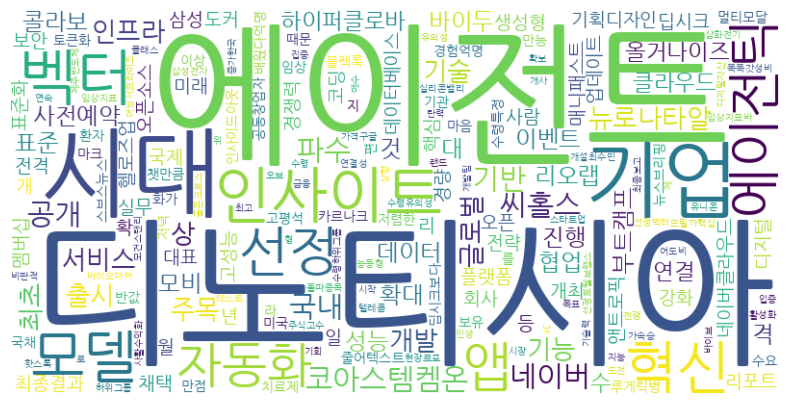

In [8]:
hannanum = Hannanum()

# 명사만 추출
title_nouns = hannanum.nouns(all_title)

# 단어 빈도 계산
word_counts = Counter(title_nouns)

# 워드 클라우드 그리기
# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()